In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL

from keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import optimizers, losses, callbacks
from keras.models import Sequential

In [19]:
data_dir= '../input/flowers-recognition/flowers/flowers'

In [20]:
batch_size=32
img_height= 180
img_width= 180

train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=12,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.
Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [21]:
class_names= train_ds.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [22]:
# Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [23]:
# Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

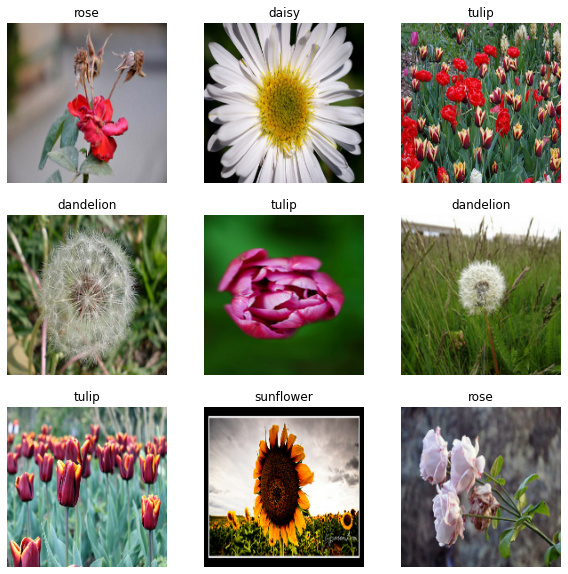

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [26]:
import tensorflow as tf
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [28]:
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [30]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)


In [31]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 76s 609ms/step - loss: 1.6814 - accuracy: 0.2915 - val_loss: 1.1820 - val_accuracy: 0.4745
Epoch 2/10
109/109 [==============================] - 65s 601ms/step - loss: 1.1161 - accuracy: 0.5343 - val_loss: 1.1442 - val_accuracy: 0.5231
Epoch 3/10
109/109 [==============================] - 66s 604ms/step - loss: 0.9312 - accuracy: 0.6516 - val_loss: 1.0353 - val_accuracy: 0.5891
Epoch 4/10
109/109 [==============================] - 66s 603ms/step - loss: 0.7812 - accuracy: 0.7035 - val_loss: 1.0546 - val_accuracy: 0.5972
Epoch 5/10
109/109 [==============================] - 65s 598ms/step - loss: 0.5160 - accuracy: 0.8042 - val_loss: 1.0823 - val_accuracy: 0.6019
Epoch 6/10
109/109 [==============================] - 65s 597ms/step - loss: 0.3690 - accuracy: 0.8766 - val_loss: 1.2370 - val_accuracy: 0.6308
Epoch 7/10
109/109 [==============================] - 66s 605ms/step - loss: 0.1961 - accuracy: 0.9419 - val_loss: 1.5303 - val_ac

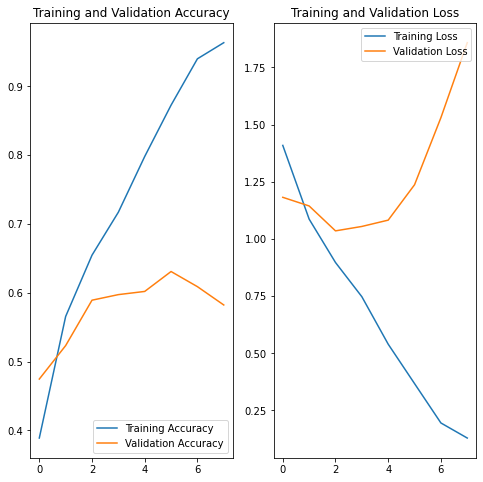

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
num_classes = 5
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [34]:
model2.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [35]:
from keras.callbacks import EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)


In [36]:
epochs=10
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 144s 1s/step - loss: 1.7998 - accuracy: 0.3260 - val_loss: 1.0875 - val_accuracy: 0.5428
Epoch 2/10
109/109 [==============================] - 143s 1s/step - loss: 1.0210 - accuracy: 0.5826 - val_loss: 1.1407 - val_accuracy: 0.5637
Epoch 3/10
109/109 [==============================] - 143s 1s/step - loss: 0.8636 - accuracy: 0.6594 - val_loss: 0.9485 - val_accuracy: 0.6366
Epoch 4/10
109/109 [==============================] - 143s 1s/step - loss: 0.6499 - accuracy: 0.7534 - val_loss: 0.9602 - val_accuracy: 0.6493
Epoch 5/10
109/109 [==============================] - 143s 1s/step - loss: 0.4507 - accuracy: 0.8383 - val_loss: 1.0516 - val_accuracy: 0.6574
Epoch 6/10
109/109 [==============================] - 144s 1s/step - loss: 0.3129 - accuracy: 0.8946 - val_loss: 1.1540 - val_accuracy: 0.6609
Epoch 7/10
109/109 [==============================] - 143s 1s/step - loss: 0.1470 - accuracy: 0.9512 - val_loss: 1.2735 - val_accuracy: 0.6412

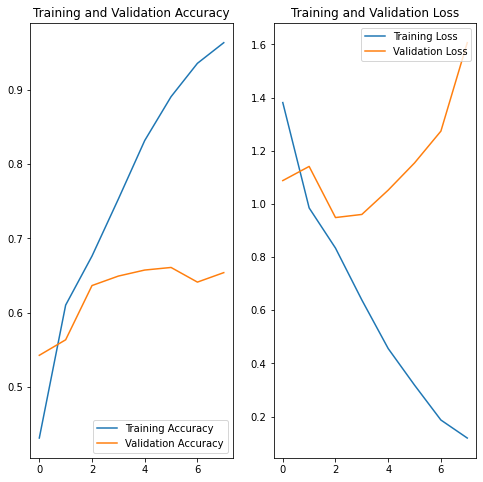

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
num_classes = 5
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),layers.Dropout(0.02),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model3.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [40]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [41]:
epochs=10
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 66s 602ms/step - loss: 1.5641 - accuracy: 0.3563 - val_loss: 1.1090 - val_accuracy: 0.5382
Epoch 2/10
109/109 [==============================] - 67s 615ms/step - loss: 1.0063 - accuracy: 0.6192 - val_loss: 1.0071 - val_accuracy: 0.5984
Epoch 3/10
109/109 [==============================] - 68s 622ms/step - loss: 0.8315 - accuracy: 0.6789 - val_loss: 0.9762 - val_accuracy: 0.6215
Epoch 4/10
109/109 [==============================] - 68s 620ms/step - loss: 0.6361 - accuracy: 0.7619 - val_loss: 0.9720 - val_accuracy: 0.6285
Epoch 5/10
109/109 [==============================] - 68s 625ms/step - loss: 0.3985 - accuracy: 0.8502 - val_loss: 1.1764 - val_accuracy: 0.6111
Epoch 6/10
109/109 [==============================] - 68s 623ms/step - loss: 0.2347 - accuracy: 0.9225 - val_loss: 1.4020 - val_accuracy: 0.6181
Epoch 7/10
109/109 [==============================] - 68s 625ms/step - loss: 0.1498 - accuracy: 0.9574 - val_loss: 1.5652 - val_ac

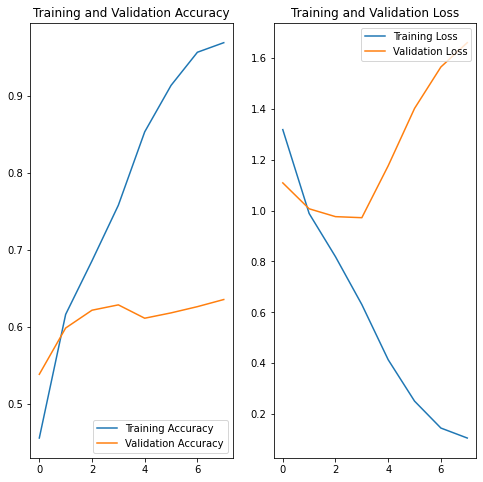

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
num_classes = 5
model4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.02),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [44]:
model4.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [45]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [46]:
epochs=10
history = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 76s 689ms/step - loss: 1.4536 - accuracy: 0.3421 - val_loss: 1.1081 - val_accuracy: 0.5324
Epoch 2/10
109/109 [==============================] - 74s 681ms/step - loss: 1.0373 - accuracy: 0.5847 - val_loss: 0.9927 - val_accuracy: 0.5972
Epoch 3/10
109/109 [==============================] - 74s 677ms/step - loss: 0.8979 - accuracy: 0.6527 - val_loss: 0.9797 - val_accuracy: 0.6111
Epoch 4/10
109/109 [==============================] - 75s 688ms/step - loss: 0.7954 - accuracy: 0.6936 - val_loss: 0.9293 - val_accuracy: 0.6458
Epoch 5/10
109/109 [==============================] - 75s 684ms/step - loss: 0.7115 - accuracy: 0.7311 - val_loss: 0.8837 - val_accuracy: 0.6620
Epoch 6/10
109/109 [==============================] - 75s 690ms/step - loss: 0.5442 - accuracy: 0.7937 - val_loss: 0.8900 - val_accuracy: 0.6771
Epoch 7/10
109/109 [==============================] - 74s 678ms/step - loss: 0.4470 - accuracy: 0.8346 - val_loss: 1.0228 - val_ac

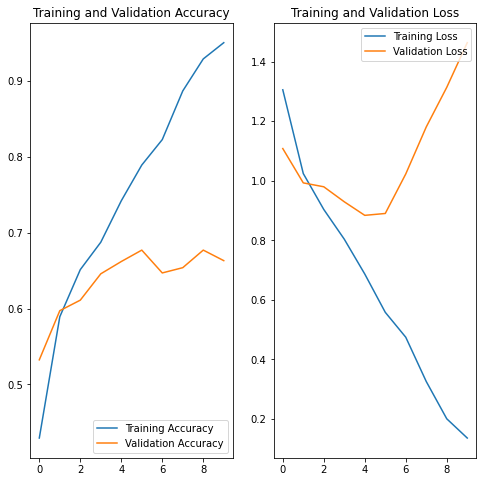

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
num_classes = 5
model5 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.02),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [49]:
model5.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [50]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [51]:
epochs=10
history = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 85s 778ms/step - loss: 1.4915 - accuracy: 0.3353 - val_loss: 1.1189 - val_accuracy: 0.5463
Epoch 2/10
109/109 [==============================] - 86s 793ms/step - loss: 1.0647 - accuracy: 0.5868 - val_loss: 0.9856 - val_accuracy: 0.5914
Epoch 3/10
109/109 [==============================] - 88s 810ms/step - loss: 0.9213 - accuracy: 0.6373 - val_loss: 0.9643 - val_accuracy: 0.6088
Epoch 4/10
109/109 [==============================] - 88s 805ms/step - loss: 0.8677 - accuracy: 0.6693 - val_loss: 0.8857 - val_accuracy: 0.6470
Epoch 5/10
109/109 [==============================] - 87s 802ms/step - loss: 0.7794 - accuracy: 0.6843 - val_loss: 0.8498 - val_accuracy: 0.6713
Epoch 6/10
109/109 [==============================] - 88s 805ms/step - loss: 0.6621 - accuracy: 0.7398 - val_loss: 0.8002 - val_accuracy: 0.6806
Epoch 7/10
109/109 [==============================] - 88s 805ms/step - loss: 0.6251 - accuracy: 0.7524 - val_loss: 0.9292 - val_ac

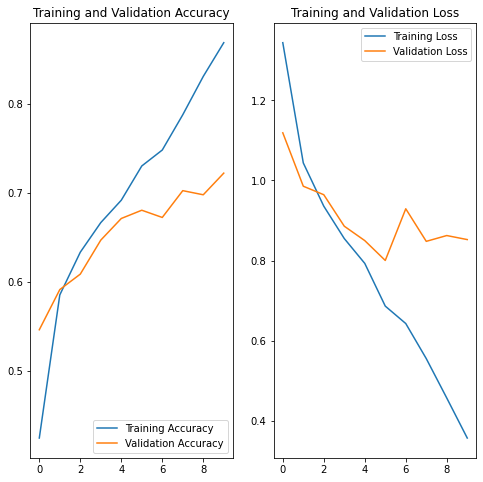

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [53]:
num_classes = 5
model6 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.02),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [54]:
model6.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [55]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [56]:
epochs=10
history = model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 83s 760ms/step - loss: 1.6213 - accuracy: 0.2932 - val_loss: 1.1546 - val_accuracy: 0.5185
Epoch 2/10
109/109 [==============================] - 83s 758ms/step - loss: 1.0829 - accuracy: 0.5553 - val_loss: 1.0844 - val_accuracy: 0.5498
Epoch 3/10
109/109 [==============================] - 81s 747ms/step - loss: 0.9653 - accuracy: 0.6202 - val_loss: 0.9374 - val_accuracy: 0.6250
Epoch 4/10
109/109 [==============================] - 81s 747ms/step - loss: 0.7976 - accuracy: 0.6903 - val_loss: 0.8551 - val_accuracy: 0.6516
Epoch 5/10
109/109 [==============================] - 81s 746ms/step - loss: 0.7127 - accuracy: 0.7313 - val_loss: 0.8646 - val_accuracy: 0.6678
Epoch 6/10
109/109 [==============================] - 81s 747ms/step - loss: 0.5782 - accuracy: 0.7814 - val_loss: 0.9162 - val_accuracy: 0.6505
Epoch 7/10
109/109 [==============================] - 80s 737ms/step - loss: 0.4705 - accuracy: 0.8322 - val_loss: 0.9734 - val_ac

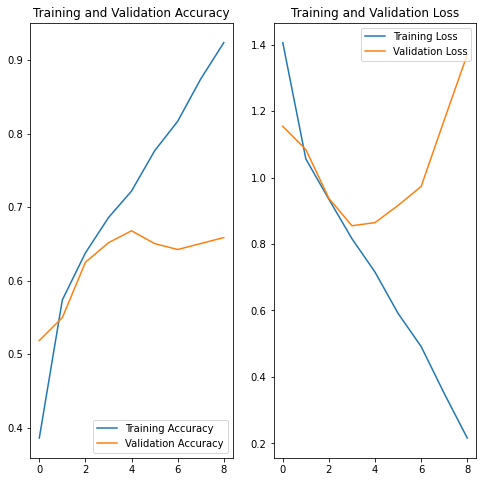

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
num_classes = 5
model7 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), 
  layers.Dropout(0.02),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [59]:
model7.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [60]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [61]:
epochs=10
history = model7.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 45s 410ms/step - loss: 1.4367 - accuracy: 0.3665 - val_loss: 1.0856 - val_accuracy: 0.5625
Epoch 2/10
109/109 [==============================] - 45s 413ms/step - loss: 1.0030 - accuracy: 0.5915 - val_loss: 0.9616 - val_accuracy: 0.6088
Epoch 3/10
109/109 [==============================] - 44s 407ms/step - loss: 0.8625 - accuracy: 0.6628 - val_loss: 0.9819 - val_accuracy: 0.6100
Epoch 4/10
109/109 [==============================] - 44s 400ms/step - loss: 0.7381 - accuracy: 0.7141 - val_loss: 0.9182 - val_accuracy: 0.6481
Epoch 5/10
109/109 [==============================] - 44s 408ms/step - loss: 0.6341 - accuracy: 0.7589 - val_loss: 0.9216 - val_accuracy: 0.6562
Epoch 6/10
109/109 [==============================] - 45s 409ms/step - loss: 0.4865 - accuracy: 0.8093 - val_loss: 1.0075 - val_accuracy: 0.6354
Epoch 7/10
109/109 [==============================] - 44s 403ms/step - loss: 0.3442 - accuracy: 0.8726 - val_loss: 1.2409 - val_ac

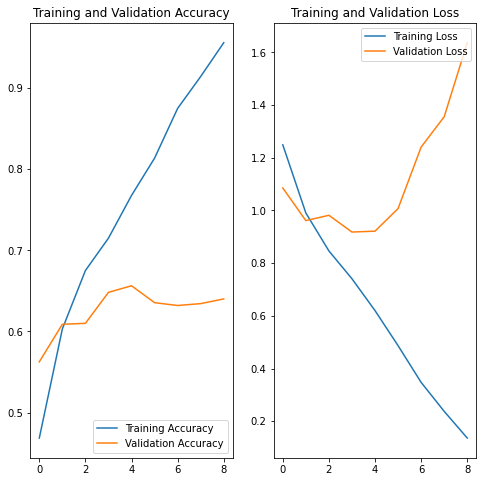

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [71]:
num_classes = 5
model8 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.02),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.02),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [72]:
model8.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [73]:
from keras.callbacks import  EarlyStopping
callback= EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [74]:
epochs=10
history = model8.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=callback
)

Epoch 1/10
109/109 [==============================] - 96s 880ms/step - loss: 1.4437 - accuracy: 0.3313 - val_loss: 1.1200 - val_accuracy: 0.5208
Epoch 2/10
109/109 [==============================] - 96s 889ms/step - loss: 1.0709 - accuracy: 0.5447 - val_loss: 0.9608 - val_accuracy: 0.6215
Epoch 3/10
109/109 [==============================] - 95s 875ms/step - loss: 0.9363 - accuracy: 0.6320 - val_loss: 0.9164 - val_accuracy: 0.6331
Epoch 4/10
109/109 [==============================] - 94s 866ms/step - loss: 0.8347 - accuracy: 0.6646 - val_loss: 0.9424 - val_accuracy: 0.6458
Epoch 5/10
109/109 [==============================] - 96s 881ms/step - loss: 0.7627 - accuracy: 0.7099 - val_loss: 0.7958 - val_accuracy: 0.7037
Epoch 6/10
109/109 [==============================] - 94s 866ms/step - loss: 0.7276 - accuracy: 0.7260 - val_loss: 0.8628 - val_accuracy: 0.6771
Epoch 7/10
109/109 [==============================] - 96s 878ms/step - loss: 0.6476 - accuracy: 0.7624 - val_loss: 0.7869 - val_ac

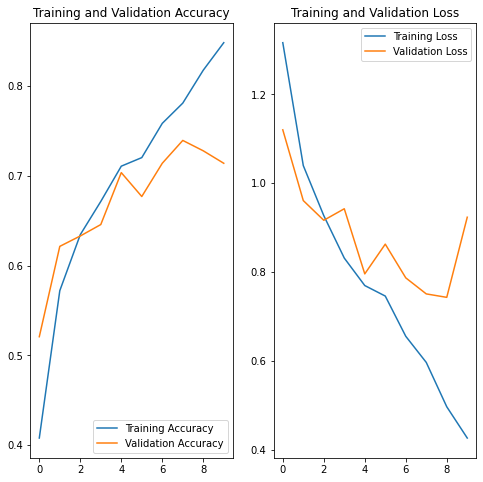

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()